## Домашняя работа №1

Напишите на Python реализацию как минимум одного алгоритма на выбор: любая на выбор цветовая обработка, перевод в другое цветовое пространство или фильтрация. Изображение выберите самостоятельно.

### 1. Изменение изображения с приминением библиотеки imageio

In [1]:
# бинаризация изображения

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import imageio

In [3]:
img = imageio.imread('white-cat-zabor.png')
img = img.astype(np.float32) / 255.

In [4]:
print(img.shape)

(854, 1280, 4)


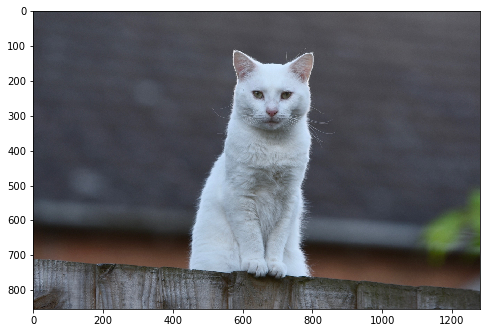

In [5]:
plt.figure(figsize=(8, 8))
plt.imshow(img);

In [6]:
threshold = 0.78 # порог бинаризации
img_bw = np.mean(img, axis=2)
img_bin = (img_bw >= threshold).astype(np.uint8)

In [7]:
img_bin[:5, :5]

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]], dtype=uint8)

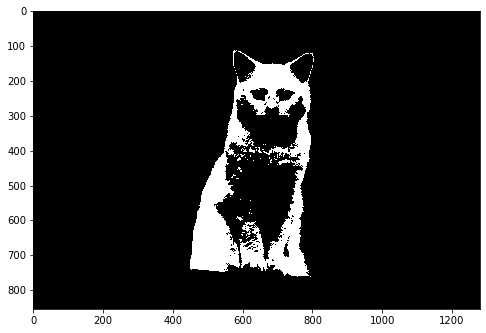

In [8]:
plt.figure(figsize=(8, 8))
plt.imshow(img_bin, cmap='gray');

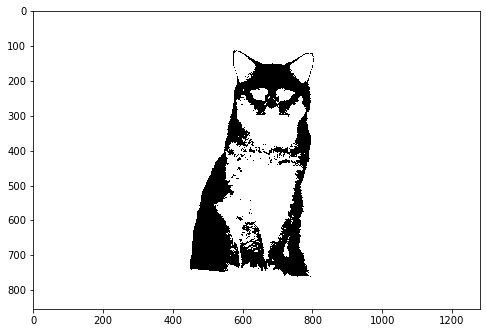

In [9]:
plt.figure(figsize=(8, 8))
plt.imshow(img_bin*(-1), cmap='gray');   # реверс изображения

In [10]:
# измененние цветового пространства

In [11]:
img_bw = img[:, :, 0]
print(img_bw.shape)

(854, 1280)


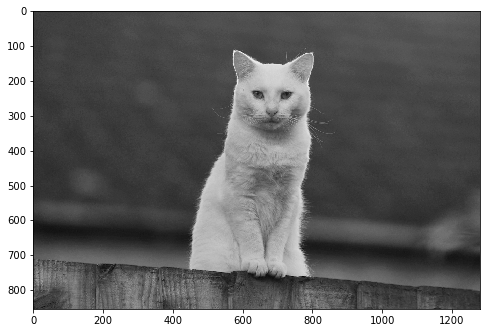

In [12]:
plt.figure(figsize=(8, 8))
plt.imshow(img_bw, cmap='gray');

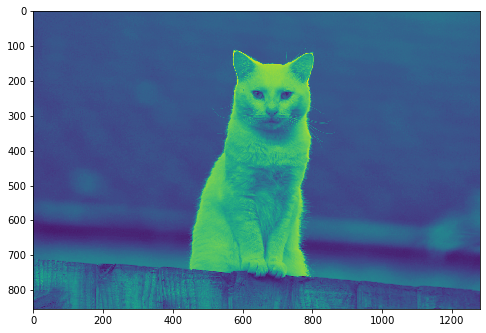

In [13]:
plt.figure(figsize=(8, 8))
plt.imshow(img_bw*3);

### 2. Удаление фона с приминением библиотеки cv2

In [14]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [15]:
# загрузить изображение и конвертировать в RGB

img_bgr = cv2.imread('white-cat-zabor.png')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

In [16]:
# значения прямоугольника: начальная X, начальная Y, ширина, высота

rectangle = (400, 100, 450, 660)

In [17]:
# создадим первоначальную маску

mask = np.zeros(img_rgb.shape[:2], np.uint8)

In [18]:
# создадим временные массивы

bgdModel = np.zeros((1,65), np.float64)
fgdModel = np.zeros((1,65), np.float64)

In [19]:
cv2.grabCut(img_rgb, mask, rectangle, bgdModel, fgdModel, 3, cv2.GC_INIT_WITH_RECT)

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[ 4.48547505e-01,  2.05984512e-01,  1.53738004e-01,
          8.19966904e-02,  1.09733289e-01,  7.13327977e+01,
          7.21556877e+01,  8.08205553e+01,  6.02755630e+01,
          6.17582351e+01,  6.90650857e+01,  8.74411524e+01,
          8.43945297e+01,  8.76689605e+01,  1.00966338e+02,
          1.10261099e+02,  1.05467422e+02,  5.26283897e+01,
          4.08076266e+01,  3.21223712e+01,  2.95093951e+01,
          2.40375592e+01,  1.67989439e+01,  2.40375592e+01,
          2.27608192e+01,  1.75709454e+01,  1.67989439e+01,
          1.75709454e+01,  1.84208908e+01,  1.99535534e+01,
          1.41845227e+01,  3.61322475e+00,  1.41845227e+01,
          1.42652942e+01,  6.52870656e+00,  3.61322475e+00,
          6.52870656e+00,  2.58532594e+01,  8.97358676

In [20]:
mask_2 = np.where((mask==2) | (mask==0), 0, 1).astype('uint8')

In [21]:
img_rgb_nobg = img_rgb * mask_2[:, :, np.newaxis]

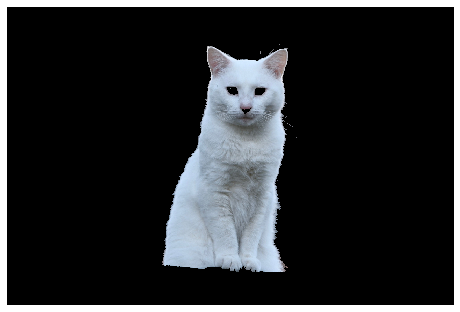

In [22]:
plt.figure(figsize=(8, 8))
plt.imshow(img_rgb_nobg)
plt.axis('off')
plt.show()